# 18일차

## 머신러닝

### 연습문제
- 행복데이터에서 'Logged GDP'로 'Ladder score' 를 __선형회귀__로 예측하려고 한다.
- 가중치를 변화시키면 오차값이 변화한다. 여기서 오차값은 Mean Squared Error(MSE)로 계산한다.
- 절편값 b=0 으로 고정했을 때, 가중치 w의 변화에 따른 오차값의 변화를 그래프로 그리시오.<br>
(w는0~10사이의 값)
> 여기서 구한 오차값 그래프를 __비용함수__ (Cost Function)이라고 한다. <br>오차값의 변화를 그래프로 그리시오.(w는-2~2사이의 값)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [15]:
X=happy[['Logged GDP per capita']].values
y=happy['Ladder score'].values

In [17]:
w=0
b=0
pred_y=w*X[:,0]+b # 예측값
error=((y-pred_y)**2).mean() # 오차값(MSE)
error

31.757878060402685

In [18]:
w=0.1
b=0
pred_y=w*X[:,0]+b # 예측값
error=((y-pred_y)**2).mean() # 오차값(MSE)
error

22.02828685295302

In [25]:
ws=np.arange(-2,2,0.1)
ws

array([-2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        1.77635684e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  1.30000000e+00,  1.40000000e+00,  1.50000000e+00,
        1.60000000e+00,  1.70000000e+00,  1.80000000e+00,  1.90000000e+00])

In [26]:
errors=[]
b=0
for w in ws:
    pred_y=w*X[:,0]+b
    error=((y-pred_y)**2).mean()
    errors.append(error)

errors

[605.6092694966442,
 559.7597194999328,
 515.7161674426844,
 473.47861332489913,
 433.04705714657706,
 394.421498907718,
 357.601938608322,
 322.58837624838907,
 289.3808118279192,
 257.97924534691253,
 228.3836768053689,
 200.59410620328836,
 174.61053354067084,
 150.4329588175165,
 128.06138203382523,
 107.49580318959705,
 88.73622228483197,
 71.78263931952995,
 56.635054293691056,
 43.293467207315224,
 31.75787806040249,
 22.028286852952853,
 14.104693584966304,
 7.987098256442846,
 3.675500867382478,
 1.1699014177851992,
 0.4702999076510113,
 1.5766963369799138,
 4.489090705771907,
 9.207483014026987,
 15.731873261745163,
 24.06226144892643,
 34.19864757557078,
 46.141031641678225,
 59.88941364724876,
 75.44379359228238,
 92.8041714767791,
 111.97054730073889,
 132.94292106416182,
 155.7212927670478]

Text(0, 0.5, 'Error')

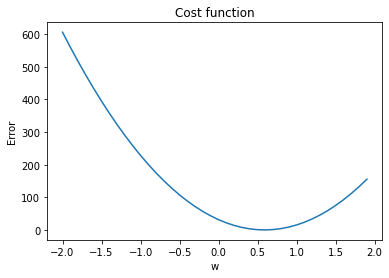

In [28]:
plt.title('Cost function')
plt.plot(ws,errors)
plt.xlabel('w')
plt.ylabel('Error')